In [35]:
import cPickle
import os
from tools import *
d = load_data()

In [36]:
# Create or load a clean data file

if 'clean_data.pkl' in os.listdir('.'):
    d_clean = manual_load_data('clean_data.pkl')
    print 'data was loaded'
else:
    d_clean = {}
    print 'data was created'

data was loaded


# P07

- removed t14: lag. Trial name is Roman_Occlusion_NoCue_LeftToRight0001  
- removed t28: lag. Trial name is Roman_Visible_Cue_LeftToRight0004
- removed t44: drop in data. Trial name: Roman_Visible_NoCue_RightToLeft0001
- edited t13: startmovement. Tiral name: Roman_Occlusion_NoCue_LeftToRight0000

In [3]:
d_clean['P07'] = d['P07']

del d_clean['P07']['trials']['t14']
del d_clean['P07']['trials']['t28']
del d_clean['P07']['trials']['t44']

curve = np.array(d_clean['P07']['trials']['t13']['startmovement'])
curve[400:600] = 0
d_clean['P07']['trials']['t13']['startmovement'] = tuple(curve)

# P08

- removed t22: drop in the data. Name: Roman_Occlusion_NoCue_RightToLeft0004  
- removed t26: index & thumb deop at the end + lag. Trial name: Roman_Visible_Cue_LeftToRight0001  
- removed t30: lag. Trial name: 'Roman_Visible_Cue_LeftToRight0007'  
- removed t36: lag. Trial name: 'Roman_Visible_Cue_RightToLeft0006'  

In [4]:
d_clean['P08'] = d['P08']

del d_clean['P08']['trials']['t22']
del d_clean['P08']['trials']['t26']
del d_clean['P08']['trials']['t30']
del d_clean['P08']['trials']['t36']


# P09

- removed t13: earlier reach. Trial name: Roman_Occlusion_NoCue_LeftToRight0000

In [5]:
d_clean['P09'] = d['P09']

del d_clean['P09']['trials']['t13']

# P 11

- removed t1: early reach. Name: Roman_Occlusion_Cue_RightToLeft0003  
- removed t13: early reach. Name: Roman_Occlusion_NoCue_LeftToRight0000  
- removed t10: too early reach. Name: Roman_Occlusion_Cue_LeftToRight0000  
- removed t17: drop data. Name: Roman_Occlusion_NoCue_LeftToRight0004

In [6]:
d_clean['P11'] = d['P11']

del d_clean['P11']['trials']['t10']
del d_clean['P11']['trials']['t13']
del d_clean['P11']['trials']['t1']
del d_clean['P11']['trials']['t17']

# curve = np.array(d_clean['P11']['trials']['t17']['startmovement'])
# curve[0:300] = 0
# d_clean['P11']['trials']['t17']['startmovement'] = tuple(curve)

# P 12

- removed t31: no data at the end of trial + lag. Name: Roman_Visible_Cue_RightToLeft0000  
- removed t22: lag. Name: Roman_Occlusion_NoCue_RightToLeft0004  
- removed t12: looks like a lag, data missing. Name: Roman_Occlusion_Cue_RightToLeft0005


In [7]:
d_clean['P12'] = d['P12']

del d_clean['P12']['trials']['t31']
del d_clean['P12']['trials']['t22']
del d_clean['P12']['trials']['t12']

# P16

- removed t1: no reach. Name: Roman_Occlusion_Cue_LeftToRight0000  
- removed t16: looks like a lag, no data. Name: Roman_Occlusion_NoCue_LeftToRight0003  
- removed t26: early reach. Name: Roman_Visible_Cue_LeftToRight0001  
- removed t41: no data at the beginning. Name: Roman_Visible_NoCue_LeftToRight0004  
- removed t46: no data. Name: Roman_Visible_NoCue_RightToLeft0003  
- removed t48: lag. Name: Roman_Visible_NoCue_RightToLeft0005
- recalculated startmovement with wrist12vel
- edited t22: startmovement. Name: Roman_Occlusion_NoCue_RightToLeft0004
- edited t47: startmovement. Name: Roman_Visible_NoCue_RightToLeft0004

In [8]:
d_clean['P16'] = d['P16']

del d_clean['P16']['trials']['t1']
del d_clean['P16']['trials']['t16']
del d_clean['P16']['trials']['t26']
del d_clean['P16']['trials']['t41']
del d_clean['P16']['trials']['t46']
del d_clean['P16']['trials']['t48']

for trial in d_clean['P16']['trials'].values():
    x = []
    for point in trial['wrist12vel']:
        if point > 0.05:
            x.append(1)
        else:
            x.append(0)
    trial['startmovement']= tuple(x)

curve = np.array(d_clean['P16']['trials']['t22']['startmovement'])
curve[200:400] = 0
d_clean['P16']['trials']['t22']['startmovement'] = tuple(curve)

curve = np.array(d_clean['P16']['trials']['t47']['startmovement'])
curve[200:400] = 0
d_clean['P16']['trials']['t47']['startmovement'] = tuple(curve)

# P 18

- removed t12: drop in the data. Name: Roman_Occlusion_Cue_RightToLeft0005  
- removed t15: drop. Name: Roman_Occlusion_NoCue_LeftToRight0002  
- removed t19: drop. Name: Roman_Occlusion_NoCue_RightToLeft0000
- removed t47: strange data at grasp. too rapid. Name: Roman_Visible_NoCue_RightToLeft0004

In [9]:
d_clean['P18'] = d['P18']

del d_clean['P18']['trials']['t12']
del d_clean['P18']['trials']['t15']
del d_clean['P18']['trials']['t19']
del d_clean['P18']['trials']['t47']

# P19

- removed t3: drops. Name: Roman_Occlusion_Cue_LeftToRight0002  
- removed t5: drop. Name: Roman_Occlusion_Cue_LeftToRight0004  
- removed t7: drop. Name: Roman_Occlusion_Cue_RightToLeft0000  
- removed t12: drop. Name: Roman_Occlusion_Cue_RightToLeft0005  
- removed t34: drop. Name: Roman_Visible_Cue_RightToLeft0003


In [10]:
d_clean['P19'] = d['P19']

del d_clean['P19']['trials']['t3']
del d_clean['P19']['trials']['t5']
del d_clean['P19']['trials']['t7']
del d_clean['P19']['trials']['t12']
del d_clean['P19']['trials']['t34']

# P21

- removed t22: drop. Name: Roman_Occlusion_NoCue_RightToLeft0004  
- recalculated startmovement with wrist11vel for all trials

In [11]:
d_clean['P21'] = d['P21']

del d_clean['P21']['trials']['t22']

for trial in d_clean['P21']['trials'].values():
    sm = []
    for point in trial['wrist11vel']:
        if point < 0.05:
            sm.append(0)
        else:
            sm.append(1)
        trial['startmovement'] = tuple(sm)

# P22

- removed t47: data drop. Name: Roman_Visible_NoCue_RightToLeft0004  


- edited t27: startmovement. Name: Roman_Visible_Cue_LeftToRight0003  
- edited t28: startmovement. Name: Roman_Visible_Cue_LeftToRight0004  
- edited t33: startmovement. Name: Roman_Visible_Cue_RightToLeft0002  
- edited t35: startmovement. Name: Roman_Visible_Cue_RightToLeft0005  
- edited t36: startmovement. Name: Roman_Visible_Cue_RightToLeft0006  
- edited t39: startmovement. Name: Roman_Visible_NoCue_LeftToRight0002  
- edited t42: startmovement. Name: Roman_Visible_NoCue_LeftToRight0005  
- edited t48: startmovement. Name: Roman_Visible_NoCue_RightToLeft0005  

This participant made slight wist movements before the tone 

In [12]:
d_clean['P22'] = d['P22']

del d_clean['P22']['trials']['t47']

curve = np.array(d_clean['P22']['trials']['t27']['startmovement'])
curve[600:890] = 0
d_clean['P22']['trials']['t27']['startmovement'] = tuple(curve)

curve = np.array(d_clean['P22']['trials']['t28']['startmovement'])
curve[600:902] = 0
d_clean['P22']['trials']['t28']['startmovement'] = tuple(curve)

curve = np.array(d_clean['P22']['trials']['t33']['startmovement'])
curve[500:600] = 0
d_clean['P22']['trials']['t33']['startmovement'] = tuple(curve)

curve = np.array(d_clean['P22']['trials']['t35']['startmovement'])
curve[500:870] = 0
d_clean['P22']['trials']['t35']['startmovement'] = tuple(curve)

curve = np.array(d_clean['P22']['trials']['t36']['startmovement'])
curve[700:870] = 0
d_clean['P22']['trials']['t36']['startmovement'] = tuple(curve)

curve = np.array(d_clean['P22']['trials']['t39']['startmovement'])
curve[600:870] = 0
d_clean['P22']['trials']['t39']['startmovement'] = tuple(curve)

curve = np.array(d_clean['P22']['trials']['t42']['startmovement'])
curve[500:600] = 0
d_clean['P22']['trials']['t42']['startmovement'] = tuple(curve)

curve = np.array(d_clean['P22']['trials']['t48']['startmovement'])
curve[400:700] = 0
d_clean['P22']['trials']['t48']['startmovement'] = tuple(curve)

# P23

- removed t3: drop in the data. Name: Roman_Occlusion_Cue_LeftToRight0002  
- removed t31: early reach. Name: Roman_Visible_Cue_RightToLeft0000  
- swapped index8 for index7 in t33. index8 only produced noisy data just in this trial. Name: Roman_Visible_Cue_RightToLeft0002  
- removed t35: lag at the end. Name: Roman_Visible_Cue_RightToLeft0005  

In [13]:
d_clean['P23'] = d['P23']

del d_clean['P23']['trials']['t3']
del d_clean['P23']['trials']['t31']
del d_clean['P23']['trials']['t35']

d_clean['P23']['trials']['t33']['index8x'] = d['P23']['trials']['t33']['index7x']
d_clean['P23']['trials']['t33']['index8y'] = d['P23']['trials']['t33']['index7y']
d_clean['P23']['trials']['t33']['index8z'] = d['P23']['trials']['t33']['index7z']

d_clean['P23']['trials']['t33']['index7x'] = d['P23']['trials']['t33']['index8x']
d_clean['P23']['trials']['t33']['index7y'] = d['P23']['trials']['t33']['index8y']
d_clean['P23']['trials']['t33']['index7z'] = d['P23']['trials']['t33']['index8z']

# P25

- removed t12: data drop. Name: Roman_Occlusion_Cue_RightToLeft0005  
- removed t14: data drop. Name: Roman_Occlusion_NoCue_LeftToRight0001  
- removed t16: data drop + lag. Name: Roman_Occlusion_NoCue_LeftToRight0003  
- removed t27: lag. Name: Roman_Visible_Cue_LeftToRight0003  
- removed t39: data drop. Name: Roman_Visible_NoCue_LeftToRight0002  

- recalclated all trials' startmovement with wrist11vel  
- edited t20: startmovement. Name: Roman_Occlusion_NoCue_RightToLeft0002  

In [14]:
d_clean['P25'] = d['P25']

del d_clean['P25']['trials']['t12']
del d_clean['P25']['trials']['t14']
del d_clean['P25']['trials']['t16']
del d_clean['P25']['trials']['t27']
del d_clean['P25']['trials']['t39']

for trial in d_clean['P25']['trials'].values():
    velcurve = np.array(trial['wrist11vel'])
    sm = velcurve >= 0.05
    trial['startmovement'] = tuple(sm)

curve = np.array(d_clean['P25']['trials']['t20']['startmovement'])
curve[400:600] = 0
d_clean['P25']['trials']['t20']['startmovement'] = tuple(curve)

# P26

- removed t1: drop in the data. Name: Roman_Occlusion_Cue_LeftToRight0000  
- removed t23: microsof security message during trial. Name: Roman_Occlusion_NoCue_RightToLeft0005

In [15]:
d_clean['P26'] = d['P26']

del d_clean['P26']['trials']['t1']
del d_clean['P26']['trials']['t23']

# P29

- removed t19: drop in the data. Name: Roman_Occlusion_NoCue_RightToLeft0000  
- edited t24: startmovement. Name: Roman_Visible_Cue_LeftToRight0000  


- t14 looks suspicious: very fast reach, mabe remove. Name: Roman_Occlusion_NoCue_LeftToRight0001

In [16]:
d_clean['P29'] = d['P29']

del d_clean['P29']['trials']['t19']

curve = np.array(d_clean['P29']['trials']['t24']['startmovement'])
curve[200:400] = 0
d_clean['P29']['trials']['t24']['startmovement'] = tuple(curve)

# P30

- removed t43: lag. Name: Roman_Visible_NoCue_RightToLeft0000 


This participant did not do the task well: did not pursue the object when occluded, saccades to the centre of the screen, wait there and grasp in the centre. Mean grasp accuracy on the occluded trials is 11 cm. Exclude.


In [17]:
# d_clean['P30'] = d['P30']
# del d_clean['P30']['trials']['t43']

# P31

- edited t1: startmovement. Name: Roman_Occlusion_Cue_LeftToRight0000

In [18]:
d_clean['P31'] = d['P31']

curve = np.array(d_clean['P31']['trials']['t1']['startmovement'])
curve[400:600] = 0
d_clean['P31']['trials']['t1']['startmovement'] = tuple(curve)

# P35

- removed t2: sensor came off. Name: Roman_Occlusion_Cue_LeftToRight0001  
- removed t11: data drop. Name: Roman_Occlusion_Cue_RightToLeft0004  
- removed t15: data drop. Name: Roman_Occlusion_NoCue_LeftToRight0003  
- removed t24: lag+data drop. Name: Roman_Visible_Cue_LeftToRight0001  
- removed t31: windows msg. Name: Roman_Visible_Cue_RightToLeft0003  

This participant got tired at the end of session. Stopped the third block half-way. Remove in the future

In [37]:
d_clean['P35'] = d['P35']

del d_clean['P35']['trials']['t2']
del d_clean['P35']['trials']['t11']
del d_clean['P35']['trials']['t15']
del d_clean['P35']['trials']['t24']
del d_clean['P35']['trials']['t31']

Roman_Occlusion_NoCue_LeftToRight0003


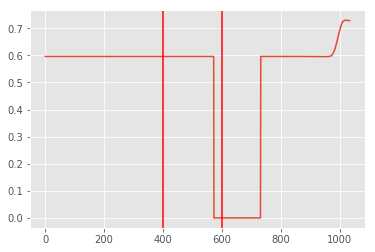

In [33]:
trial = d_clean['P35']['trials']['t15']

print trial['name']

plt.plot(trial['index8x'])
plt.axvline(400, color = 'red')
plt.axvline(600, color = 'red')
plt.show()

In [39]:
manual_save_data(d_clean, 'clean_data.pkl')

The data will be overwritten. Continue? Yes/noYes
